In [6]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize 
%matplotlib inline

In [90]:
Tech_KR =['005930.KS','000660.KS','035420.KS', '035720.KS' ] #삼성, SK하이닉스, 네이버, 카카오   

def get_price(companies): 
    df=pd.DataFrame()
    for company in companies:
        df[company]=yf.Ticker(company).history(start='2018-04-01', end='2020-03-31')['Close']
    return df

def get_div(companies): 
    df=pd.DataFrame()
    for company in companies:
        df[company]=yf.Ticker(company).history(start='2018-04-01',end='2020-03-31')['Dividends']
    return df  

p_KR=get_price(Tech_KR)
d_KR=get_div(Tech_KR)

p_KR.columns=['SS', 'SKH', 'NVR', 'KKO']
d_KR.columns=['SS', 'SKH', 'NVR', 'KKO']

In [91]:
p_KR.head()

,SS,SKH,NVR,KKO
Date,,,,
2018-04-02,47380.375000,79270.882812,156585.734375,129000.0
2018-04-03,46970.406250,79758.406250,156585.734375,128500.0
2018-04-04,45799.074219,78393.343750,150402.093750,123500.0
2018-04-05,47575.593750,80830.953125,155388.906250,124500.0
2018-04-06,47243.718750,78295.843750,153593.656250,122500.0


In [92]:
#포트폴리오 도시

#3000개의 임의의 weights를 생성해서 return, risk를 도시
weights = np.random.rand(len(Tech_KR))
weights = weights/np.sum(weights)  #np.weights = 100% 의 비율을 넘지 않는다. 
weights

array([0.37087667, 0.11323639, 0.30518818, 0.21069876])

In [93]:
#임의의 생선된 난수에 대한 Return
r_a= (p_KR.iloc[-1]+d_KR.sum())/p_KR.iloc[0]-1
port_return= np.dot(weights, r_a)
port_return #약11% 포토폴리오 수익이 나타난다. 


0.07179736452288352

In [94]:
#임의의 생성된 난수에 대한 Risk
covar_KR=(p_KR/p_KR.shift()-1).cov()*252
port_risk= np.dot(weights.T, np.dot(covar_KR, weights))
port_risk

0.05675199332863408

In [95]:
#weights의 조합에 따른 포트폴리오 리턴, 리스크
port_returns=[]
port_risks=[]
for ii in range(3000):
    weights=np.random.rand(len(Tech_KR))
    weights=weights/np.sum(weights)
    r_a= (p_KR.iloc[-1]+d_KR.sum())/p_KR.iloc[0]-1
    port_return= np.dot(weights, r_a)
    covar_KR=(p_KR/p_KR.shift()-1).cov()*252
    port_risk= np.dot(weights.T, np.dot(covar_KR, weights))
    port_returns.append(port_return)
    port_risks.append(port_risk)

In [73]:
port_returns

[0.07675008992692647,
 0.08535183266719515,
 0.08464140605300133,
 0.07743048196657415,
 0.0987198594171194,
 0.07119389592526112,
 0.06143395641358272,
 0.12281606662902997,
 0.09265205339433112,
 0.09339538407553546,
 0.05592016598686615,
 0.06840445421712235,
 0.10767116143022133,
 0.10177265019881065,
 0.057147717426447926,
 0.09160643206866735,
 0.1112298422980936,
 0.08695217116116076,
 0.05236598783188838,
 0.10847974808100705,
 0.06754137814626704,
 0.0722243466334891,
 0.09652236640491677,
 0.10964725507830295,
 0.10957784696188819,
 0.07216781193514844,
 0.09180533120816775,
 0.12250018325927708,
 0.11979106436791442,
 0.07530487374057993,
 0.07392429819263718,
 0.13959450922338834,
 0.07471055058761597,
 0.09204243786926639,
 0.07256533842982188,
 0.048577754878624216,
 0.09068562638181471,
 0.07455413043028415,
 0.06424855731054241,
 0.09377052282050574,
 0.09964215243510814,
 0.09422417743296824,
 0.08888817032874835,
 0.09806867299689276,
 0.07703757006164304,
 0.09682618

In [97]:
#행열 계산을 위해
port_returns = np.array(port_returns)
port_returns
port_risks= np.array(port_risks)

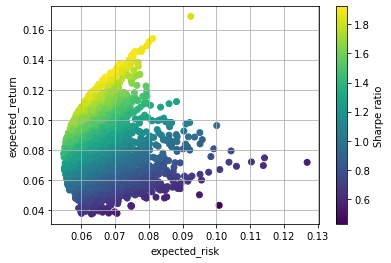

In [98]:
plt.scatter(port_risks, port_returns, c=port_returns/port_risks)
plt.colorbar(label='Sharpe ratio')
plt.xlabel('expected_risk')
plt.ylabel('expected_return')
plt.grid(True)
plt.show()

In [ ]:
#최적화 문제 정의
목적함수 : Sharpe ratio(max), Risk (min)
선택변수 : weights
제약(constraint) : 모든 weights의 합은 1
한계(boundary) : 각 weight는 0과 1 사이

In [ ]:
#포트폴리오 최적화 
minimize(목적함수, w0, constraints=, bounds=)

In [99]:
#목적함수 정의 
#먼저, weights를 넣으면, return, risk, sharpe raio를 return 하는 함수를 정의 => 목적함수 정의
def get_stats(weights):
    r_a= (p_KR.iloc[-1]+d_KR.sum())/p_KR.iloc[0]-1
    port_return= np.dot(weights, r_a)
    covar_KR=(p_KR/p_KR.shift(1)-1).cov()*252
    port_risk= np.dot(weights.T, np.dot(covar_KR, weights))
    port_sharpe= port_return/ port_risk 
    return [port_return, port_risk, port_sharpe]

def objective_return(weights):
    return -get_stats(weights)[0]

def objective_risk(weights):
    return get_stats(weights)[1]

def objective_sharpe(weights):
    return -get_stats(weights)[2]
    

In [100]:
get_stats(weights)

[0.06144608235630536, 0.07606159540758325, 0.807846351723767]

In [101]:
#w0정의
w0=np.ones(len(Tech_KR))/len(Tech_KR)

In [102]:
#constraints
constraints={'type':'eq', 'fun': lambda x: np.sum(x)-1 }

In [103]:
#bounds
bound=(0,1)
bounds= tuple(bound for ii in range(len(Tech_KR)))

In [104]:
#최적화 1. Risk 최소
opt_risk = minimize(objective_risk, w0, constraints=constraints, bounds=bounds)
# 최적화 2. Sharpe ration 최대
opt_sharpe= minimize(objective_sharpe, w0, constraints=constraints, bounds=bounds )

In [111]:
opt_sharpe

     fun: -1.9256732971324633
     jac: array([1.92554206, 1.9260751 , 1.92541391, 1.92568441])
 message: 'Optimization terminated successfully'
    nfev: 37
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.21402728, 0.07832125, 0.0417137 , 0.66593776])

In [112]:
opt_risk['fun'] # 최적화된 risk
opt_risk['x'] # 그때의 weights (포트폴리오)

array([5.15939513e-01, 1.04083409e-17, 2.30534722e-01, 2.53525765e-01])

In [113]:
-opt_sharpe['fun'] # 최적화된 sharpe ratio
opt_sharpe['x'] # 그때의 weights (포트폴리오)

array([0.21402728, 0.07832125, 0.0417137 , 0.66593776])

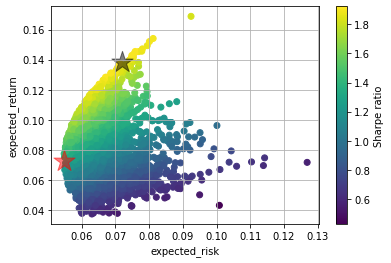

In [114]:
plt.scatter(port_risks, port_returns, c=port_returns/port_risks)
plt.colorbar(label='Sharpe ratio')
pt_opt_sharpe=get_stats(opt_sharpe['x'])
plt.scatter(pt_opt_sharpe[1], pt_opt_sharpe[0], marker='*', s=500, c='black', alpha=0.5)
pt_opt_risk=get_stats(opt_risk['x'])
plt.scatter(pt_opt_risk[1], pt_opt_risk[0], marker='*', s=500, c='red', alpha=0.5)
plt.xlabel('expected_risk')
plt.ylabel('expected_return')
plt.grid(True)
plt.show()

In [49]:
# 효율적 투자점 : 목표 수익을 달성하기 위한 최소 risk를 가질 수 있는 포트폴리오
target_returns= np.linspace(0.14, 0.23, 50)

In [51]:
target_risks=[]
target_port={}

for target_return in target_returns : 
    constraints = ({'type' : 'eq', 'fun' : lambda x : np.sum(x) -1}, 
                  {'type' : 'eq', 'fun' : lambda x : get_stats(x)[0] -target_return })
    
    opt_target = minimize ( objective_risk,w0, constraints = constraints, bounds = bounds)
    target_risks.append(opt_target['fun'])
    target_port[target_return]= opt_target['x']
    
    
target_risks=np.array(target_risks)

In [115]:
target_risks

array([0.07271285, 0.07370381, 0.07472106, 0.0757646 , 0.07683653,
       0.07793058, 0.07905373, 0.08020154, 0.08137819, 0.08258687,
       0.08382773, 0.08510076, 0.08640597, 0.08774336, 0.08911292,
       0.09051472, 0.09194989, 0.09343633, 0.09502219, 0.09670745,
       0.09849212, 0.10037619, 0.10235968, 0.10444257, 0.10662486,
       0.10890657, 0.10906946, 0.10906946, 0.10906946, 0.10906946,
       0.10906946, 0.10906946, 0.10906946, 0.10906946, 0.10906946,
       0.10906946, 0.10906946, 0.10906946, 0.10906946, 0.10906946,
       0.10906946, 0.10906946, 0.10906946, 0.10906946, 0.10906946,
       0.10906946, 0.10906946, 0.10906946, 0.10906946, 0.10906946])

In [116]:
#타겟 값에 따른 포트폴리오 비율을 나타냄 
target_port

{0.14: array([0.20592013, 0.08072119, 0.03700042, 0.67635825]),
 0.14183673469387756: array([0.19614494, 0.08444485, 0.03188424, 0.68752596]),
 0.1436734693877551: array([0.18643945, 0.088052  , 0.02678343, 0.69872512]),
 0.14551020408163268: array([0.17680502, 0.09156458, 0.02167987, 0.70995054]),
 0.14734693877551022: array([0.16582694, 0.09246773, 0.01997306, 0.72173227]),
 0.14918367346938777: array([0.1574988 , 0.09791236, 0.01202719, 0.73256164]),
 0.1510204081632653: array([0.14837866, 0.10395426, 0.0044594 , 0.74320768]),
 0.15285714285714286: array([0.13899248, 0.10521815, 0.00080525, 0.75498412]),
 0.15469387755102043: array([0.12467236, 0.10955379, 0.        , 0.76577385]),
 0.15653061224489798: array([1.09463321e-01, 1.14058963e-01, 8.67361738e-19, 7.76477717e-01]),
 0.15836734693877552: array([0.09425433, 0.11856407, 0.        , 0.7871816 ]),
 0.16020408163265307: array([0.07904532, 0.12306921, 0.        , 0.79788548]),
 0.1620408163265306: array([6.38363076e-02, 1.2757433

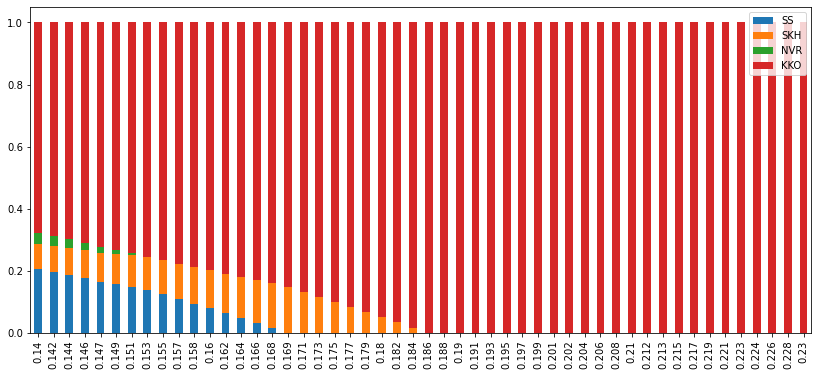

In [118]:
w= pd.DataFrame(target_port.values())
w.columns = ['SS','SKH','NVR','KKO']
w.index = target_returns.round(3)
w.plot(figsize=(14,6), kind='bar', stacked= True)

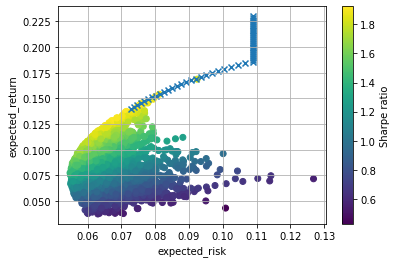

In [119]:
plt.scatter(port_risks, port_returns, c=port_returns/port_risks)
plt.colorbar(label='Sharpe ratio')
plt.scatter(target_risks, target_returns, marker='x')
plt.xlabel('expected_risk')
plt.ylabel('expected_return')
plt.grid(True)
plt.show()